In [1]:
import random
random.seed(42)
import numpy as np
import pandas as pd

In [2]:
rating = pd.read_csv("rating.csv")
rating = rating.sample(10000, random_state=42)
rating.describe()

,userId,movieId,rating
count,10000.000000,10000.000000,10000.000000
mean,69946.197800,9397.508700,3.513300
std,40270.913643,20266.782058,1.048705
min,14.000000,1.000000,0.500000
25%,35046.750000,904.000000,3.000000
50%,70725.500000,2250.500000,3.500000
75%,105056.000000,4878.000000,4.000000
max,138456.000000,130512.000000,5.000000


In [3]:
movie = pd.read_csv("movie.csv")
movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
genres_encoded = movie['genres'].str.get_dummies(sep='|')
genres_encoded = genres_encoded.drop("(no genres listed)", axis=1)
movie = pd.concat([movie, genres_encoded], axis=1)
movie = movie.drop(['title', 'genres'], axis=1)
movie.head()

,movieId,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
merged = pd.merge(rating[['userId', 'movieId']], movie, on='movieId')
merged = merged.drop("movieId", axis=1)
merged = merged.groupby('userId').sum()
merged.head()

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
userId,,,,,,,,,,,,,,,,,,,
14,0,1,2,2,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0
18,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
24,0,0,0,0,2,0,0,0,1,0,0,0,0,0,1,0,0,0,0
26,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
54,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [6]:
merged.describe()

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,8959.000000,8959.000000,8959.000000,8959.000000,8959.000000,8959.000000,8959.000000,8959.000000,8959.000000,8959.000000,8959.000000,8959.000000,8959.000000,8959.000000,8959.000000,8959.000000,8959.000000,8959.000000,8959.000000
mean,0.314544,0.247126,0.063065,0.093537,0.422034,0.184284,0.012278,0.491238,0.113182,0.012167,0.089184,0.028240,0.051122,0.083268,0.213752,0.179484,0.297131,0.056591,0.024110
std,0.488722,0.447122,0.245833,0.294251,0.536801,0.398808,0.111140,0.559385,0.320685,0.109635,0.291607,0.167676,0.221774,0.279516,0.423636,0.393261,0.481291,0.231555,0.153399
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,3.000000,3.000000,2.000000,2.000000,4.000000,2.000000,2.000000,5.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,1.000000


### GMM Clustering

First use gridsearch cv to try several n_components and covariance type. Find the best model with least BIC score and save the model.

In [7]:
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import GridSearchCV


def gmm_bic_score(estimator, X):
    """Callable to pass to GridSearchCV that will use the BIC score."""
    # Make it negative since GridSearchCV expects a score to maximize
    return -estimator.bic(X)


param_grid = {
    "n_components": range(1, 5),
    "covariance_type": ["spherical", "tied", "diag", "full"],
}
grid_search = GridSearchCV(
    GaussianMixture(random_state=42), param_grid=param_grid, scoring=gmm_bic_score
)
grid_search.fit(merged)

GridSearchCV(estimator=GaussianMixture(random_state=42),
             param_grid={'covariance_type': ['spherical', 'tied', 'diag',
                                             'full'],
                         'n_components': range(1, 5)},
             scoring=<function gmm_bic_score at 0x0000020F9E3C8550>)

In [8]:
import pandas as pd

df = pd.DataFrame(grid_search.cv_results_)[
    ["param_n_components", "param_covariance_type", "mean_test_score"]
]
df["mean_test_score"] = -df["mean_test_score"]
df = df.rename(
    columns={
        "param_n_components": "Number of components",
        "param_covariance_type": "Type of covariance",
        "mean_test_score": "BIC score",
    }
)
df.sort_values(by="BIC score").head()

,Number of components,Type of covariance,BIC score
7,4,tied,5354.726572
6,3,tied,7234.154863
5,2,tied,7867.263017
4,1,tied,9682.507879
12,1,full,9682.507879


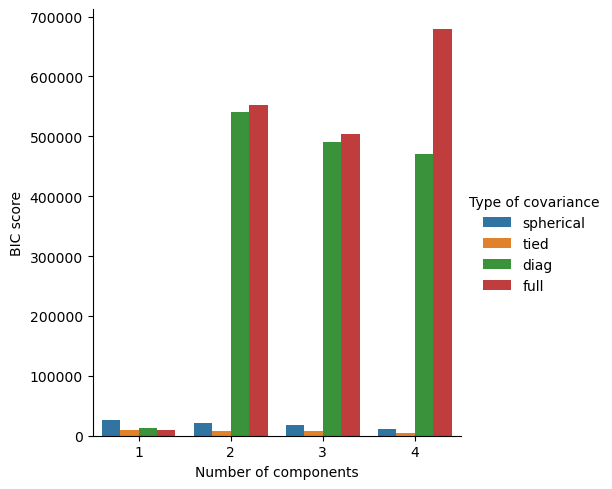

In [9]:
import seaborn as sns

sns.catplot(
    data=df,
    kind="bar",
    x="Number of components",
    y="BIC score",
    hue="Type of covariance",
)
plt.show()

In [10]:
print('best means: ',grid_search.best_estimator_.means_)
print('best covariances: ',grid_search.best_estimator_.covariances_)
print('best weights: ', grid_search.best_estimator_.weights_)
print('best covariance type and n_components: ', grid_search.best_params_)

best means:  [[8.15943707e-03 7.47014050e-02 7.28156031e-02 8.53669079e-02
  6.82351910e-01 5.33553995e-02 6.27745035e-03 6.62267429e-01
  1.54426330e-01 5.02197101e-03 3.01318994e-02 1.56937541e-02
  9.79252341e-02 4.26804659e-02 1.02950285e+00 3.38981597e-02
  9.35305887e-02 6.34024841e-02 9.41585786e-03]
 [1.17983425e-11 2.19307936e-01 1.39912844e-01 2.11003731e-01
  9.35545333e-01 1.32348076e-01 1.55934768e-03 2.70265663e-01
  1.60186678e-01 9.57515838e-04 4.33554862e-02 1.06273705e-02
  9.04543960e-02 2.80299058e-02 3.52029601e-06 9.37532436e-02
  8.71847693e-02 2.67238288e-02 2.11113194e-02]
 [1.03696855e+00 4.86136514e-01 2.84657852e-02 3.88169801e-02
  2.58410789e-01 2.49168044e-01 2.95748385e-03 3.30869420e-01
  1.07208797e-01 3.32716932e-03 7.28280397e-02 5.73012495e-02
  1.70056078e-02 6.46949601e-02 1.01665056e-01 3.81515420e-01
  5.00184880e-01 8.61368037e-02 3.21626369e-02]
 [6.97043642e-13 1.32608986e-01 3.96343911e-02 7.26552273e-02
  8.87392623e-02 2.30836863e-01 3.189

In [11]:
# save to file
# gmm_name = 'gmm_cluster'
# np.save(gmm_name + '_weights', grid_search.best_estimator_.weights_, allow_pickle=False)
# np.save(gmm_name + '_means', grid_search.best_estimator_.means_, allow_pickle=False)
# np.save(gmm_name + '_covariances', grid_search.best_estimator_.covariances_, allow_pickle=False)
# np.save(gmm_name + '_covariances_type', grid_search.best_params_['covariance_type'], allow_pickle=False)

# reload
# means = np.load(gmm_name + '_means.npy')
# covar = np.load(gmm_name + '_covariances.npy')
# loaded_gmm = GaussianMixture(n_components = len(means), covariance_type = np.load(gmm_name + '_covariances_type.npy'))
# loaded_gmm.precisions_cholesky_ = np.linalg.cholesky(np.linalg.inv(covar))
# loaded_gmm.weights_ = np.load(gmm_name + '_weights.npy')
# loaded_gmm.means_ = means
# loaded_gmm.covariances_ = covar

# compare performance on your data between the two GMMs (loaded and saved)
cats4 = grid_search.best_estimator_.predict(merged)

In [12]:
cats4

array([1, 0, 0, ..., 1, 1, 0], dtype=int64)

### BPMF

In [13]:
rating_matrix = rating.pivot(index='userId', columns='movieId', values='rating')
rating_matrix = rating_matrix.fillna(0)
R_full = rating_matrix.to_numpy()

In [14]:
D = 100

In [15]:
import random
random.seed(42)
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

from scipy.stats import invwishart
from numpy import sum, sqrt, outer, transpose, diag
from numpy.random import multivariate_normal
from scipy.sparse import coo_matrix
from numpy.linalg import inv
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE

In [16]:
def bpmf(cat):
    R = R_full[cats4 == cat]
    
    M = len(R) # number of customers/users
    N = len(R[0]) # number of movies
    U = np.ones((D, M))
    V = np.ones((D, N))
    diag_b = range(1, D + 1)
    B = diag(diag_b)

    mu_0, T_0 = np.zeros((D, 1)), np.eye(D)
    nu_0, S_0 = D, np.eye(D)
    sigma = 1

    nonzero_indices = R.nonzero()
    nonzero_values = R[nonzero_indices]
    
    n = M

    all_indices = list(range(n))
    tr_group = random.sample(all_indices, int(0.8*n))
    te_group = [i for i in all_indices if i not in tr_group]

    tr_indices = (nonzero_indices[0][tr_group], nonzero_indices[1][tr_group])
    te_indices = (nonzero_indices[0][te_group], nonzero_indices[1][te_group])

    tr_values, te_values = R[tr_indices], R[te_indices]
    R_flag = np.zeros_like(R, dtype=int)
    R_flag[tr_indices] = 1

    iters = 20

    Sigma_u, Sigma_v, Sigma_b = np.eye(D), np.eye(D), np.eye(D)

    results_df = pd.DataFrame(columns=['Iteration', 'Train_MAE', 'Test_MAE', 'Train_RMSE', 'Test_RMSE'])

    for it in range(iters):
        mu_ustar = inv(inv(T_0) + M*inv(Sigma_u))@(inv(T_0)@mu_0 + inv(Sigma_u)@sum(U, axis=1, keepdims=True))
        T_ustar = inv(inv(T_0) + M*inv(Sigma_u))
        mu_u = multivariate_normal(np.squeeze(np.asarray(transpose(mu_ustar))), T_ustar, 1)

        nu_ustar = nu_0 + M
        S_ustar = S_0 + (U - transpose(mu_u))@transpose(U - transpose(mu_u))
        inv_wishart = invwishart(nu_ustar, S_ustar)
        Sigma_u = inv_wishart.rvs()

        mu_vstar = inv(inv(T_0) + N*inv(Sigma_v))@(inv(T_0)@mu_0 + inv(Sigma_v)@sum(V, axis=1, keepdims=True))
        T_vstar = inv(inv(T_0) + N*inv(Sigma_v))
        mu_v = multivariate_normal(np.squeeze(np.asarray(transpose(mu_vstar))), T_vstar, 1)

        nu_vstar = nu_0 + N
        S_vstar = S_0 + (V - transpose(mu_v))@transpose(V - transpose(mu_v))
        inv_wishart = invwishart(nu_vstar, S_vstar)
        Sigma_v = inv_wishart.rvs()

        mu_bstar = inv(inv(T_0) + 1*inv(Sigma_b))@(inv(T_0)@mu_0 + inv(Sigma_b)@sum(B, axis=1, keepdims=True))
        T_bstar = inv(inv(T_0) + 1*inv(Sigma_b))
        mu_b = multivariate_normal(np.squeeze(np.asarray(transpose(mu_bstar))), T_bstar, 1)

        nu_bstar = nu_0 + 1
        S_bstar = S_0 + outer(diag_b - mu_b, diag_b - mu_b)
        inv_wishart = invwishart(nu_bstar, S_bstar)
        Sigma_b = inv_wishart.rvs()

        weighted_V = B@V
        for i in range(M):
            Lambda_ustar = inv(Sigma_u)
            theta_ustar = transpose(inv(Sigma_u)@transpose(mu_u))
            for j in range(N):
                if R_flag[i, j] == 0:
                    continue
                V_j = transpose(weighted_V[:, j])
                Lambda_ustar += outer(V_j, V_j)/sigma
                theta_ustar += V_j*R[i, j]/sigma
            theta_ustar = inv(Lambda_ustar)@transpose(theta_ustar)
            U[:, i] = multivariate_normal(np.squeeze(np.asarray(transpose(theta_ustar))), inv(Lambda_ustar), 1)

        weighted_U = transpose(transpose(U)@B)
        for j in range(N):
            Lambda_vstar = inv(Sigma_v)
            theta_vstar = transpose(inv(Sigma_v)@transpose(mu_v))
            for i in range(M):
                if R[i, j] == 0:
                    continue
                U_i = transpose(weighted_U[:, i])
                Lambda_vstar += outer(U_i, U_i)/sigma
                theta_vstar += U_i*R[i, j]/sigma
            theta_vstar = inv(Lambda_vstar)@transpose(theta_vstar)
            V[:, j] = multivariate_normal(np.squeeze(np.asarray(transpose(theta_vstar))), inv(Lambda_vstar), 1)

        Lambda_bstar = inv(Sigma_b)
        theta_bstar = transpose(inv(Sigma_b)@transpose(mu_b))
        for k in range(len(nonzero_indices[0])):
            i = nonzero_indices[0][k]
            j = nonzero_indices[1][k]
            A = U[:, i] * V[:, j]
            Lambda_bstar += outer(A, A)/sigma
            theta_bstar += A*R[i, j]/sigma
        theta_bstar = inv(Lambda_bstar)@transpose(theta_bstar)
        diag_b = multivariate_normal(np.squeeze(np.asarray(transpose(theta_bstar))), inv(Lambda_bstar), 1)[0]
        B = diag(diag_b)

        R_star = transpose(U)@B@V
        tr_pred_values = R_star[tr_indices]
        te_pred_values = R_star[te_indices]

        tr_mae = MAE(tr_values, tr_pred_values)
        te_mae = MAE(te_values, te_pred_values)
        tr_rmse = np.sqrt(MSE(tr_values, tr_pred_values))
        te_rmse = np.sqrt(MSE(te_values, te_pred_values))

        results_df = results_df.append({
            'Iteration': it,
            'Train_MAE': tr_mae,
            'Test_MAE': te_mae,
            'Train_RMSE': tr_rmse,
            'Test_RMSE': te_rmse
        }, ignore_index=True)

        if it % 2 == 0:
            print(f"Iteration {it}: Train MAE={tr_mae:.4f}, Test MAE={te_mae:.4f}, Train RMSE={tr_rmse:.4f}, Test RMSE={te_rmse:.4f}")
            
    return n, results_df.copy()

In [17]:
n_0, df_0 = bpmf(0)
df_0 = df_0.rename(columns={'Train_MAE':  'Train_MAE_0',  'Test_MAE':  'Test_MAE_0', 
                           'Train_RMSE': 'Train_RMSE_0', 'Test_RMSE': 'Test_RMSE_0'})

Iteration 0: Train MAE=1.0764, Test MAE=0.9462, Train RMSE=1.3576, Test RMSE=1.1825
Iteration 2: Train MAE=0.6543, Test MAE=0.6790, Train RMSE=0.8236, Test RMSE=0.8619
Iteration 4: Train MAE=0.6656, Test MAE=0.7398, Train RMSE=0.8447, Test RMSE=0.9569
Iteration 6: Train MAE=0.6483, Test MAE=0.7600, Train RMSE=0.8190, Test RMSE=0.9437
Iteration 8: Train MAE=0.6599, Test MAE=0.7523, Train RMSE=0.8284, Test RMSE=0.9435
Iteration 10: Train MAE=0.6702, Test MAE=0.7477, Train RMSE=0.8363, Test RMSE=0.9418
Iteration 12: Train MAE=0.6921, Test MAE=0.7731, Train RMSE=0.8673, Test RMSE=0.9809
Iteration 14: Train MAE=0.6674, Test MAE=0.7990, Train RMSE=0.8483, Test RMSE=1.0107
Iteration 16: Train MAE=0.6984, Test MAE=0.7891, Train RMSE=0.8804, Test RMSE=0.9823
Iteration 18: Train MAE=0.7045, Test MAE=0.7643, Train RMSE=0.8924, Test RMSE=0.9765


In [18]:
n_1, df_1 = bpmf(1)
df_1 = df_1.rename(columns={'Train_MAE':  'Train_MAE_1',  'Test_MAE':  'Test_MAE_1', 
                           'Train_RMSE': 'Train_RMSE_1', 'Test_RMSE': 'Test_RMSE_1'})

Iteration 0: Train MAE=0.9570, Test MAE=0.8994, Train RMSE=1.1898, Test RMSE=1.1354
Iteration 2: Train MAE=0.6792, Test MAE=0.8178, Train RMSE=0.8598, Test RMSE=1.0121
Iteration 4: Train MAE=0.7098, Test MAE=0.7863, Train RMSE=0.8982, Test RMSE=1.0008
Iteration 6: Train MAE=0.7024, Test MAE=0.8338, Train RMSE=0.8895, Test RMSE=1.0276
Iteration 8: Train MAE=0.7474, Test MAE=0.7966, Train RMSE=0.9317, Test RMSE=1.0154
Iteration 10: Train MAE=0.7330, Test MAE=0.8476, Train RMSE=0.9306, Test RMSE=1.0695
Iteration 12: Train MAE=0.7514, Test MAE=0.7865, Train RMSE=0.9447, Test RMSE=0.9761
Iteration 14: Train MAE=0.7375, Test MAE=0.8353, Train RMSE=0.9327, Test RMSE=1.0507
Iteration 16: Train MAE=0.7223, Test MAE=0.8481, Train RMSE=0.9149, Test RMSE=1.0655
Iteration 18: Train MAE=0.7554, Test MAE=0.7988, Train RMSE=0.9470, Test RMSE=0.9860


In [19]:
n_2, df_2 = bpmf(2)
df_2 = df_2.rename(columns={'Train_MAE':  'Train_MAE_2',  'Test_MAE':  'Test_MAE_2', 
                           'Train_RMSE': 'Train_RMSE_2', 'Test_RMSE': 'Test_RMSE_2'})

Iteration 0: Train MAE=0.8976, Test MAE=0.9267, Train RMSE=1.1295, Test RMSE=1.1834
Iteration 2: Train MAE=0.6582, Test MAE=0.7201, Train RMSE=0.8332, Test RMSE=0.9124
Iteration 4: Train MAE=0.6747, Test MAE=0.7527, Train RMSE=0.8496, Test RMSE=0.9479
Iteration 6: Train MAE=0.6790, Test MAE=0.7275, Train RMSE=0.8578, Test RMSE=0.9348
Iteration 8: Train MAE=0.6820, Test MAE=0.7817, Train RMSE=0.8554, Test RMSE=0.9938
Iteration 10: Train MAE=0.6974, Test MAE=0.7643, Train RMSE=0.8809, Test RMSE=0.9773
Iteration 12: Train MAE=0.6874, Test MAE=0.7629, Train RMSE=0.8698, Test RMSE=0.9718
Iteration 14: Train MAE=0.7085, Test MAE=0.7457, Train RMSE=0.8941, Test RMSE=0.9515
Iteration 16: Train MAE=0.7095, Test MAE=0.7329, Train RMSE=0.8982, Test RMSE=0.9602
Iteration 18: Train MAE=0.7152, Test MAE=0.7598, Train RMSE=0.9086, Test RMSE=0.9866


In [20]:
n_3, df_3 = bpmf(3)
df_3 = df_3.rename(columns={'Train_MAE':  'Train_MAE_3',  'Test_MAE':  'Test_MAE_3', 
                           'Train_RMSE': 'Train_RMSE_3', 'Test_RMSE': 'Test_RMSE_3'})

Iteration 0: Train MAE=0.9168, Test MAE=1.0223, Train RMSE=1.1571, Test RMSE=1.3018
Iteration 2: Train MAE=0.6431, Test MAE=0.8124, Train RMSE=0.8110, Test RMSE=1.0186
Iteration 4: Train MAE=0.6724, Test MAE=0.7755, Train RMSE=0.8470, Test RMSE=0.9825
Iteration 6: Train MAE=0.6877, Test MAE=0.7745, Train RMSE=0.8728, Test RMSE=0.9789
Iteration 8: Train MAE=0.6960, Test MAE=0.7957, Train RMSE=0.8764, Test RMSE=0.9882
Iteration 10: Train MAE=0.6899, Test MAE=0.7370, Train RMSE=0.8642, Test RMSE=0.9326
Iteration 12: Train MAE=0.7207, Test MAE=0.7466, Train RMSE=0.9082, Test RMSE=0.9429
Iteration 14: Train MAE=0.7075, Test MAE=0.7240, Train RMSE=0.8944, Test RMSE=0.9289
Iteration 16: Train MAE=0.7036, Test MAE=0.7593, Train RMSE=0.8868, Test RMSE=0.9505
Iteration 18: Train MAE=0.6970, Test MAE=0.7351, Train RMSE=0.8770, Test RMSE=0.9337


In [21]:
merged_df = pd.merge(df_0, df_1, on='Iteration')
merged_df = pd.merge(merged_df, df_2, on='Iteration')
merged_df = pd.merge(merged_df, df_3, on='Iteration')

merged_df['Tot_Train_MAE'] = (n_0 * merged_df['Train_MAE_0'] + n_1 * merged_df['Train_MAE_1'] + n_2 * merged_df['Train_MAE_2'] + n_3 * merged_df['Train_MAE_3']) / (n_0 + n_1 + n_2 + n_3)
merged_df['Tot_Test_MAE'] = (n_0 * merged_df['Test_MAE_0'] + n_1 * merged_df['Test_MAE_1'] + n_2 * merged_df['Test_MAE_2'] + n_3 * merged_df['Test_MAE_3']) / (n_0 + n_1 + n_2 + n_3)
merged_df['Tot_Train_RMSE'] = np.sqrt((n_0 * merged_df['Train_RMSE_0']**2 + n_1 * merged_df['Train_RMSE_1']**2 + n_2 * merged_df['Train_RMSE_2']**2 + n_3 * merged_df['Train_RMSE_3']**2) / (n_0 + n_1 + n_2 + n_3))
merged_df['Tot_Test_RMSE'] = np.sqrt((n_0 * merged_df['Test_RMSE_0']**2 + n_1 * merged_df['Test_RMSE_1']**2 + n_2 * merged_df['Test_RMSE_2']**2 + n_3 * merged_df['Test_RMSE_3']**2) / (n_0 + n_1 + n_2 + n_3))

In [22]:
merged_df.to_csv(f'gmm_results_D={D}.csv', index=False)